# Introduction to Data Science
## Homework 5

Student Name: Xinmeng Li

Student Netid: xl1575
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

Example: Let's say given a sentence, we want to identify the character it describes is SpongeBob SquarePants or Patrick Star. Imagine a case that a word 'rock' in the test document does not exist in the vocabulary of the training set of Patrick Star, $P(rock|PS)$ and $P(PS|sentence)$ thus becomes 0. Consequently, the classifier loses information about other words, i.e. $P(PS|sentence)$ = 0 even though when the sentence contains words such as 'pink' or 'starfish'. Clearly, Patrick Star lives under a rock and it is likely that 'rock' occurs in the description. To avoid this senario, we use laplace smoothing, which garantees that the count of each word is at least 1. We add 2 to the denominator to ensure that the probability of all of the classes still sum to 1. There are a lot of words that just occured a few times, and thus their $P(e_i \mid c)$ are small when alpha is small. As a result, small changes to $P(e_i \mid c)$ could lead to a dramatic change of $P(c|E)$. For example, divide it or subtract it so that $P(e_i \mid c)$ is close or equal to 0. This is a high variance low bias situation. When alpha is large, i.e. alpha >> count(e,c), for a fixed class, the value of $P(e_i \mid c)$ almost keeps constant across all of the words. The value of count(e,c) has little effect on $P(e_i \mid c)$. This is a low variance but high bias situation. To avoid these two cases we use cross validation to find the optimal alpha in practice.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [82]:
# Code here
import pandas as pd
import numpy as np
data = pd.read_csv("imdb.csv")
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [83]:
# Code here
data['Target']=[ 1 if d=='P' else 0 for d in data['Class']]
data.head()

,Text,Class,Target
0,'One of the first of the best musicals Anchors...,P,1
1,'Visually disjointed and full of itself the di...,N,0
2,'These type of movies about young teenagers st...,P,1
3,'I would rather of had my eyes gouged out with...,N,0
4,'The title says it all. Tail Gunner Joe was a ...,N,0


3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [84]:
#Code here
X = data['Text']
Y = data['Target']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75)

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer(stop_words = 'english',ngram_range = (1,2),binary=True)
X_train_countv = vectorizer.fit_transform(X_train)
X_test_countv = vectorizer.transform(X_test)
vectorizer2 = TfidfVectorizer(stop_words = 'english',ngram_range = (1,2),binary=True)
X_train_tfidfv = vectorizer2.fit_transform(X_train)
X_test_tfidfv = vectorizer2.transform(X_test)

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [86]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


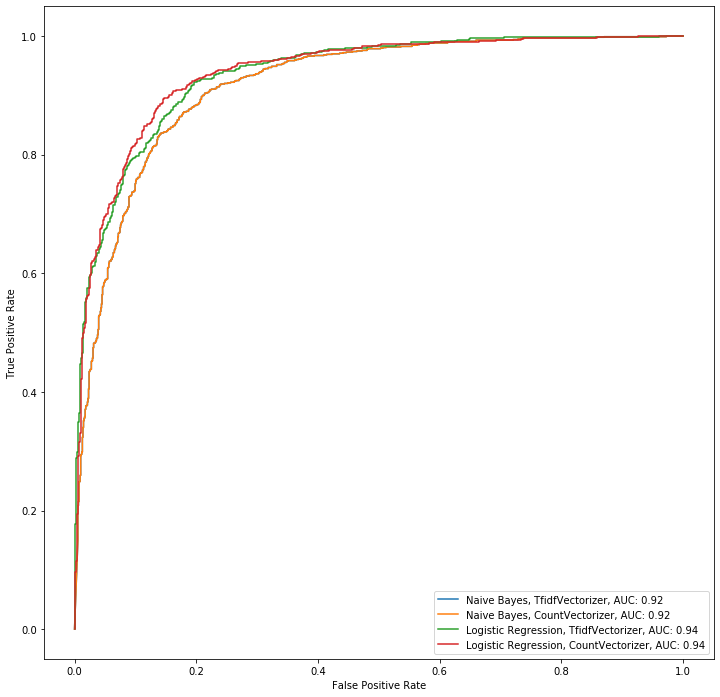

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Code here
for i in range(2):
    for j in range(2):
        info = ""
        if i==1:
            clf = LogisticRegression()
            info+="Logistic Regression, "
        else:
            clf = BernoulliNB()
            info+="Naive Bayes, "
        if j==1:
            X_train_v = X_train_countv
            X_test_v = X_test_countv
            info+="CountVectorizer, "
        else:
            X_train_v = X_train_tfidfv
            X_test_v = X_test_tfidfv
            info+="TfidfVectorizer, "
            
        clf.fit(X_train_v,Y_train)
        probs = clf.predict_proba(X_test_v)
        probs = probs[:, 1]
        auc = roc_auc_score(Y_test, probs)
        auc = roc_auc_score(Y_test, probs)
        fpr, tpr, _ = roc_curve(Y_test, probs)
        plt.plot(fpr, tpr,label=info+'AUC: %.2f' % auc)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Based on the AUC score, naive bayes(0.92) performs worse than logistic regression(0.94) with both count and tf-idf vectorizers. This might because naive bayes strongly assumes that each feature, i.e.word is independent of others, and this assumption cannot be true in the real world language. We observe that when the false positive rate is around 0.1~0.2, the red curve of logistic regression+countvectorizer is above the green curve of logistic regression+tfidfvectorizer, which indicates that if the false positive rates of these two models are same, logistic regression+countvectorizer model has a higher rate of correctly identifing positive labels. Therefore, logistic regression+countvectorizer model is the best among these four models. 

Extra credit: The Naive Bayes performs identically on these two types of vectorizers. They have the same AUC score, and their curves totally overlap. We cannot even see the blue curve of naive bayes+tfidfvectorizer under the orange curve of naive bayes+countvectorizer. (Note: To make sure the blue line does exist, I plotted it with dot marker. It turns out that the track of the blue dots overlap with the orange curve.) Logically, tfidf vectorizer filters out words that occur frequently but have little information, so these two vectorizers should lead to different performances. Since we have filtered out uninformative stopwords before the transformation, and naive bayes calculating conditional probaility of each feature occuring with each class, these two models almost have identical curves.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples were labeled positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [88]:
# Code here to display 5 incorrect reviews.
clf = LogisticRegression()
clf.fit(X_train_countv,Y_train)
result = clf.predict(X_test_countv)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [130]:
n = 0
for i in range(0,len(result)):
    if result[i]==0 and Y_test.iloc[i]==1:
        if 'like' in X_test.iloc[i] and len(X_test.iloc[i])<1000:
            print(X_test.iloc[i])
            n+=1
    if n==5:
        break

'WOW! What - a - movie !!!!!!!!!!! Im not at all a fan of contemporary Italian directors. Usually I dont like dramas. I am not a Will Smith super fan even thinking that he is a very good actor......but this movie ! It is such a great movie with a such original script and so good direction and so well acting...wow...it is stunning. This movie captured my attention minute by minute and I even did not like The pursuit of happiness (maybe also because i did not like the acting of Wills son who is a very bad actor while children usually seems all natural born actors I saw him also last night in The day the earth stood still and I confirmed my sensation that Jaden cant act). I dont want to write spoilers and so i dont talk about the story but what I can say is that this movie talks about Love Death and other feelings which i dont like to watch in movies....but THIS MOVIE is such a super great movie. If you have a minimum of heart youll dont regret watching it'
'after seeing this film for the

Based on the analysis below, we found out that in most cases, misclassified reviews contain many negative words such as not, or words with negative meaning such as worst, which provide misleading information to the model prediction. Consequently, although there also exist some positive words such as great and well written in their reviews, the model tends to classify these reviews as nagative label. <br>1.The user uses a lot of negative descriptions including 'Im not at all a fan','Usually I dont like dramas. I am not a Will Smith super fan','I even did not like The pursuit of happiness', and 'feelings which i dont like to watch in movies', and much less postive sentences such as 'so good direction and so well acting' and 'such a super great movie'<br>2.This review contains strongly negative words such as 'worst','poor' and 'bottom'. It seems like the reviewer is a fan of Adam Sandler, which explains the reason why the review is critical but the rating is high. It would be hard to improve model's performance on classifying this type of reviews, as the label is not consistent with the emotion of the language. <br>3.This review contains a mix of negative words such as 'extremely bad','extremely fake' and positive words such as 'extremely well done','very well written', which makes it hard for the model to identify the reviewer's attitude.<br>4. The user admits the movie is funny and this is the reason why a high rating is given, but this review is mainly about the problems of the movie, which is misleading. <br>5.This review does not have many strongly negative or positive words. Therefore, it does not have a strong tendacy to a label, and the model is likely to make a wrong decision in this case.<br>